In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle

# Đọc dữ liệu từ file Excel
df = pd.read_excel('data_slr.xlsx', sheet_name="data")

df

,TimeAds,ProfitRate
0,0.5,1
1,2.0,2
2,4.0,7
3,5.0,8
4,3.0,5
5,6.0,8
6,7.0,9
7,9.0,12
8,8.0,10
9,1.0,3


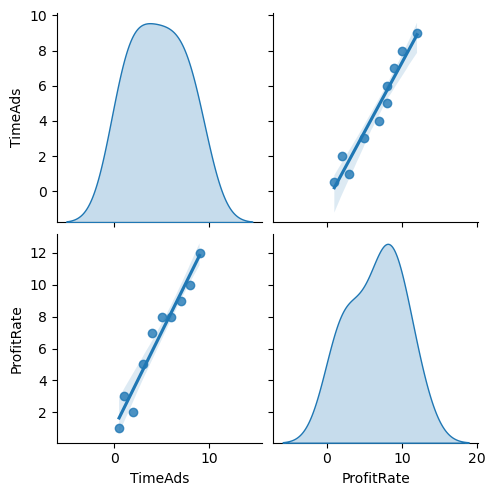

In [18]:
# Vẽ đồ thị phân tán và hồi quy
sns.pairplot(df[['TimeAds', 'ProfitRate']], diag_kind='kde', kind='reg')
plt.show()



In [19]:
# Tập dữ liệu Input (đặc trưng) và Output (mục tiêu)
X = df[['TimeAds']].values  # explanatory = feature
y = df[['ProfitRate']].values  # reponse = target

# Đảm bảo dữ liệu là kiểu số thực
X = X.astype(float)
y = y.astype(float)



In [20]:
# Chia tách ra training (huấn luyện) và testing (kiểm thử)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=16)

# Khai báo mô hình SLR
model = linear_model.LinearRegression()

# Huấn luyện mô hình 
model.fit(X_train, y_train)



LinearRegression()

In [22]:
# Lấy các hệ số hồi quy b0 và b1
b0 = model.intercept_[0]  # Hệ số chặn
b1 = model.coef_[0][0]    # Hệ số góc

print(f'Hệ số chặn (b0): {b0}')
print(f'Hệ số góc (b1): {b1}')

# In ra phương trình hồi quy
print(f'Phương trình hồi quy: Y^ = {b0:.4f} + {b1:.4f} * X')


Hệ số chặn (b0): 1.2153110047846898
Hệ số góc (b1): 1.1483253588516744
Phương trình hồi quy: Y^ = 1.2153 + 1.1483 * X


In [23]:
# Tính giá trị dự đoán Y^ từ công thức Y^ = b0 + b1 * X
y_train_pred = b0 + b1 * X_train.flatten()
y_test_pred = b0 + b1 * X_test.flatten()
y_test_pred


array([ 9.25358852,  5.80861244,  1.78947368, 11.55023923])

In [25]:
y_train_pred

array([10.40191388,  4.66028708,  6.9569378 ,  3.51196172,  8.10526316,
        2.36363636])

In [26]:
# Tạo DataFrame để hiển thị kết quả trên tập huấn luyện
results_train_df = pd.DataFrame({
    'TimeAds': X_train.flatten(),
    'Actual_ProfitRate (Y)': y_train.flatten(),
    'Predicted_ProfitRate (Y^)': y_train_pred
})

# Tạo DataFrame để hiển thị kết quả trên tập kiểm tra
results_test_df = pd.DataFrame({
    'TimeAds': X_test.flatten(),
    'Actual_ProfitRate (Y)': y_test.flatten(),
    'Predicted_ProfitRate (Y^)': y_test_pred
})

results_train_df

,TimeAds,Actual_ProfitRate (Y),Predicted_ProfitRate (Y^)
0,8.0,10.0,10.401914
1,3.0,5.0,4.660287
2,5.0,8.0,6.956938
3,2.0,2.0,3.511962
4,6.0,8.0,8.105263
5,1.0,3.0,2.363636


In [27]:
results_test_df

,TimeAds,Actual_ProfitRate (Y),Predicted_ProfitRate (Y^)
0,7.0,9.0,9.253589
1,4.0,7.0,5.808612
2,0.5,1.0,1.789474
3,9.0,12.0,11.550239


In [31]:
# Tính phần dư E cho tập huấn luyện
results_train_df['E (Residual)'] = results_train_df['Actual_ProfitRate (Y)'] - results_train_df['Predicted_ProfitRate (Y^)']
results_train_df['E^2'] = results_train_df['E (Residual)'] ** 2
results_train_df['|E| (Absolute Residual)'] = results_train_df['E (Residual)'].abs()

# Tính phần dư E cho tập kiểm tra
results_test_df['E (Residual)'] = results_test_df['Actual_ProfitRate (Y)'] - results_test_df['Predicted_ProfitRate (Y^)']
results_test_df['E^2'] = results_test_df['E (Residual)'] ** 2
results_test_df['|E| (Absolute Residual)'] = results_test_df['E (Residual)'].abs()

# Hiển thị kết quả
print("Kết quả trên tập huấn luyện:")
results_train_df





Kết quả trên tập huấn luyện:


,TimeAds,Actual_ProfitRate (Y),Predicted_ProfitRate (Y^),E (Residual),E^2,|E| (Absolute Residual)
0,8.0,10.0,10.401914,-0.401914,0.161535,0.401914
1,3.0,5.0,4.660287,0.339713,0.115405,0.339713
2,5.0,8.0,6.956938,1.043062,1.087979,1.043062
3,2.0,2.0,3.511962,-1.511962,2.286028,1.511962
4,6.0,8.0,8.105263,-0.105263,0.011080,0.105263
5,1.0,3.0,2.363636,0.636364,0.404959,0.636364


In [33]:
print("\nKết quả trên tập kiểm tra:")
results_test_df


Kết quả trên tập kiểm tra:


,TimeAds,Actual_ProfitRate (Y),Predicted_ProfitRate (Y^),E (Residual),E^2,|E| (Absolute Residual)
0,7.0,9.0,9.253589,-0.253589,0.064307,0.253589
1,4.0,7.0,5.808612,1.191388,1.419404,1.191388
2,0.5,1.0,1.789474,-0.789474,0.623269,0.789474
3,9.0,12.0,11.550239,0.449761,0.202285,0.449761


In [38]:
# Tính trung bình của |E| (Mean Absolute Error) cho cả hai tập
mean_absolute_error_train = results_train_df['|E| (Absolute Residual)'].mean()
mean_absolute_error_test = results_test_df['|E| (Absolute Residual)'].mean()

print('Mean Absolute Error (Train):', mean_absolute_error_train)
print('Mean Absolute Error (Test):', mean_absolute_error_test)



Mean Absolute Error (Train): 0.6730462519936201
Mean Absolute Error (Test): 0.6710526315789472


In [41]:
# Tính trung bình của phần dư E cho cả hai tập

if mean_absolute_error_test > mean_absolute_error_train:
    print("Mô hình không tốt ")
# Nếu độ lỗi trung bình (MAE) trên tập kiểm tra lớn hơn so với tập huấn luyện, điều này cho thấy mô hình đã học quá mức các đặc điểm trong dữ liệu huấn luyện. Hệ quả là nó không thể dự đoán chính xác trên dữ liệu mới mà nó chưa từng thấy, dẫn đến việc mô hình trở nên kém hiệu quả trong việc tổng quát.    
elif mean_absolute_error_test < mean_absolute_error_train:
    print("Tốt ")
#  Nếu độ lỗi trung bình trên tập kiểm tra thấp hơn so với tập huấn luyện, điều này cho thấy mô hình hoạt động tốt hơn với dữ liệu mới so với dữ liệu huấn luyện. Mặc dù đây không phải là tình huống phổ biến, nhưng điều này có thể chỉ ra rằng mô hình đã học được các quy luật chung và không chỉ đơn thuần là học thuộc lòng dữ liệu huấn luyện.
else:
    print("Tốt")
# Nếu độ lỗi trung bình là tương đương giữa hai tập, điều này cho thấy mô hình có khả năng dự đoán ổn định trên cả dữ liệu đã thấy và chưa thấy. Điều này là dấu hiệu tốt cho thấy mô hình không bị overfitting và có khả năng tổng quát tốt.

Tốt 


In [36]:
# Lưu trữ mô hình đã huấn luyện xuống ổ đĩa
pickle.dump(model, open('model_linear_regression.sav', 'wb'))



In [37]:
# Load model từ storage
loaded_model = pickle.load(open('model_linear_regression.sav', 'rb'))

vTimeAds = float(input('Nhập thời lượng quảng cáo: '))

predicted_ProfitRate = loaded_model.predict([[vTimeAds]])

print(f'Dự báo điểm ProfitRate là: {predicted_ProfitRate}')


Dự báo điểm ProfitRate là: [[3.51196172]]
